In [3]:
import pandas as pd
import numpy as np

Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
3. Create a boxplot for each feature in the dataset. 
4. Compare distributions and identify outliers.

In [4]:
df=pd.read_csv("Iris.csv")

In [5]:
numerical=df.select_dtypes(exclude='object')

In [6]:
numerical

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [8]:
categorical=df.select_dtypes(include='object')

In [9]:
categorical

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>]], dtype=object)

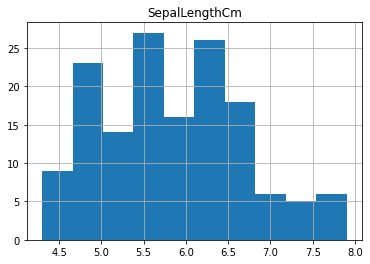

In [9]:
df.hist(column='SepalLengthCm')

array([[<Axes: title={'center': 'PetalLengthCm'}>]], dtype=object)

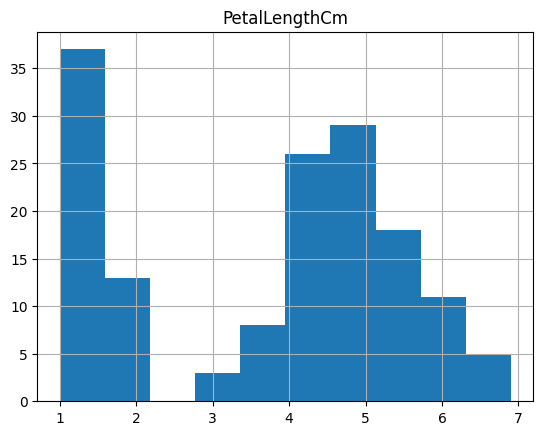

In [10]:
df.hist(column='PetalLengthCm')

array([[<Axes: title={'center': 'SepalWidthCm'}>]], dtype=object)

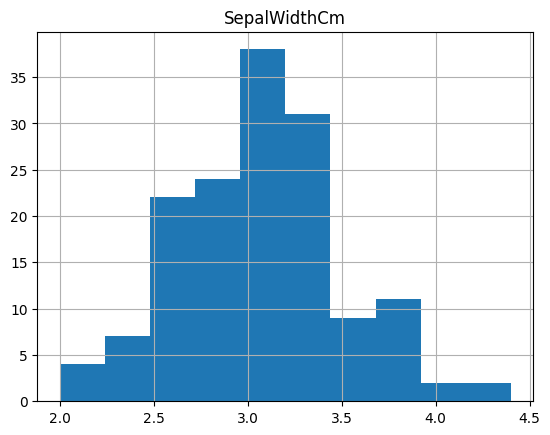

In [11]:
df.hist(column='SepalWidthCm')

array([[<Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

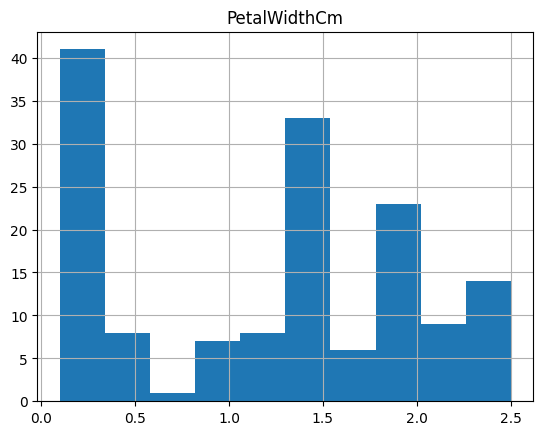

In [12]:
df.hist(column='PetalWidthCm')

array([[<Axes: title={'center': 'SepalWidthCm'}>]], dtype=object)

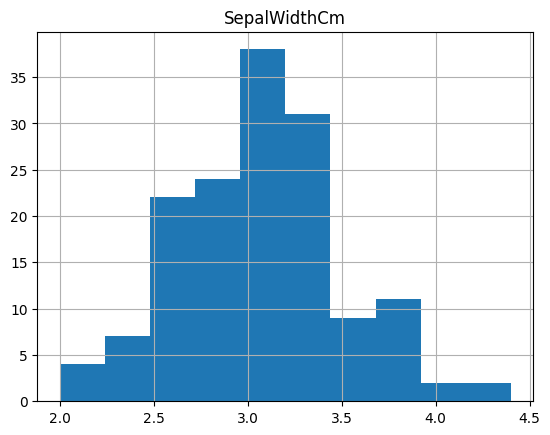

In [14]:
df.hist(column='SepalWidthCm')

<Axes: >

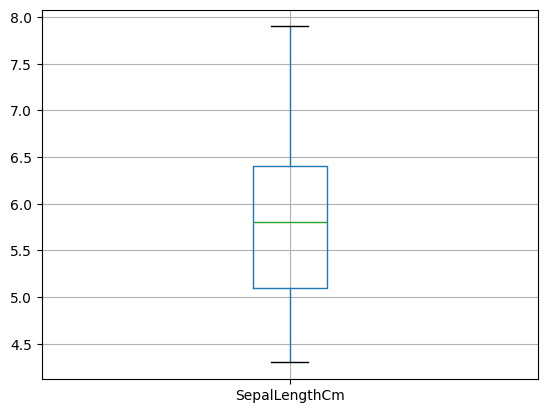

In [15]:
df.boxplot(column='SepalLengthCm')

<Axes: >

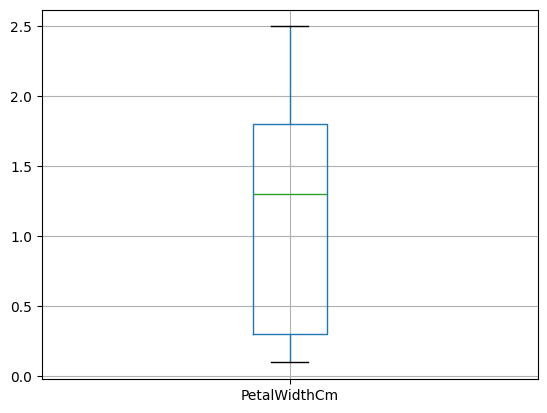

In [16]:
df.boxplot(column='PetalWidthCm')

<Axes: >

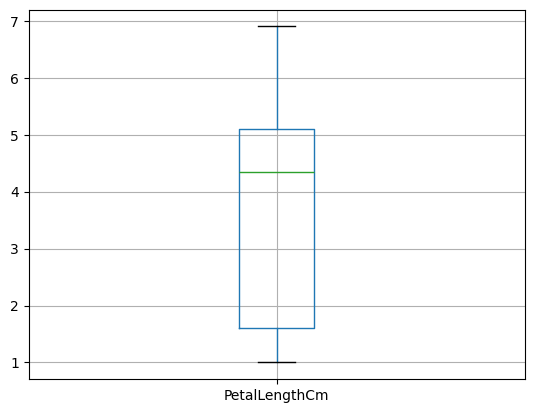

In [17]:
df.boxplot(column='PetalLengthCm')

In [29]:
def find_outliers_IQR(df):
    # Filter numeric columns
    numeric_cols = df.select_dtypes(include=['number'])
    
    if numeric_cols.empty:
        print("No numerical columns found in the DataFrame.")
        return
    
    q1 = numeric_cols.quantile(0.25)
    q3 = numeric_cols.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(numeric_cols < lower_bound) | (numeric_cols > upper_bound)]
    return outliers

outliers = find_outliers_IQR(df)
if outliers is not None:
    print("Number of outliers: " + str(len(outliers)))
    print("Max outlier value: " + str(outliers.max()))
    print("Min outlier value: " + str(outliers.min()))


Number of outliers: 150
Max outlier value: Id                NaN
SepalLengthCm     NaN
SepalWidthCm      4.4
PetalLengthCm     NaN
PetalWidthCm      NaN
Species          None
dtype: object
Min outlier value: Id                NaN
SepalLengthCm     NaN
SepalWidthCm      2.0
PetalLengthCm     NaN
PetalWidthCm      NaN
Species          None
dtype: object


In [27]:
outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
import seaborn as sns

# Load the Iris dataset
iris_data = sns.load_dataset('iris')

# Function to find outliers using IQR method
def find_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Find outliers for each feature
outliers = {}
for column in iris_data.columns[:-1]:  # Exclude the target variable 'species'
    outliers[column] = find_outliers_IQR(iris_data[column])

# Print outliers
for feature, values in outliers.items():
    print("Outliers in {}: \n{}".format(feature, values))


Outliers in sepal_length: 
Series([], Name: sepal_length, dtype: float64)
Outliers in sepal_width: 
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64
Outliers in petal_length: 
Series([], Name: petal_length, dtype: float64)
Outliers in petal_width: 
Series([], Name: petal_width, dtype: float64)


In [38]:
import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Function to find outliers using IQR method
def find_outliers_IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Find outliers for each feature
outliers = {}
for feature in iris_data.columns[:-1]:  # Exclude the target variable 'species'
    outliers[feature] = find_outliers_IQR(iris_data[feature])

# Print outliers
for feature, values in outliers.items():
    print("Outliers in {}: \n{}".format(feature, values))


Outliers in sepal_length: 
Series([], Name: sepal_length, dtype: float64)
Outliers in sepal_width: 
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64
Outliers in petal_length: 
Series([], Name: petal_length, dtype: float64)
Outliers in petal_width: 
Series([], Name: petal_width, dtype: float64)
